# <div style="font-size:60px;padding:10px 10px;color:#FF5851;text-align:center;font-weight:900">TELCO CHURN PREDICTION</div>

# <div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20;line-height:22px"><b>Objective:</b><br><li>In-depth Exploratory Data Analysis<br><li>Predicting Churn<br><li>Predicting Tenure<br><li>Predicting on a custom user data</div>

# <div style="background-color:#414A6B;font-size:40px;padding:10px 10px;color:white;border:4px solid #1C1B20">Dataset Information</div>

# <div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20;line-height:20px"><li><b>Customers who left within the last month</b> – the column is called Churn<br><br><li><b>Services that each customer has signed up for</b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br><br><li><b>Customer account information</b> – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br><br><li><b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents</div>

# <div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20;line-height:24px"><li><b>customerID</b>- Customer ID<br><li><b>gender</b>- Whether the customer is a male or a female<br><li><b>SeniorCitizen</b>- Whether the customer is a senior citizen or not (1, 0)<br><li><b>Partner</b>- Whether the customer has a partner or not (Yes, No)<br><li><b>Dependents</b>- Whether the customer has dependents or not (Yes, No)<br><li><b>tenure</b>- Number of months the customer has stayed with the company<br><li><b>PhoneService</b>- Whether the customer has a phone service or not (Yes, No)<br><li><b>MultipleLines</b>- Whether the customer has multiple lines or not (Yes, No, No phone service)<br><li><b>InternetService</b>- Customer’s internet service provider (DSL, Fiber optic, No)<br><li><b>OnlineSecurity</b>- Whether the customer has online security or not (Yes, No, No internet service)<br><li><b>OnlineBackup</b>- Whether the customer has online backup or not (Yes, No, No internet service)<br><li><b>DeviceProtection</b>- Whether the customer has device protection or not (Yes, No, No internet service)<br><li><b>TechSupport</b>- Whether the customer has tech support or not (Yes, No, No internet service)<br><li><b>StreamingTV</b>- Whether the customer has streaming TV or not (Yes, No, No internet service)<br><li><b>StreamingMovies</b>- Whether the customer has streaming movies or not (Yes, No, No internet service)<br><li><b>Contract</b>- The contract term of the customer (Month-to-month, One year, Two year)<br><li><b>PaperlessBilling</b>- Whether the customer has paperless billing or not (Yes, No)<br><li><b>PaymentMethod</b>- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br><li><b>MonthlyCharges</b>- The amount charged to the customer monthly<br><li><b>TotalCharges</b>- The total amount charged to the customer<br><li><b>Churn</b>- Whether the customer churned or not (Yes or No)<br>
</div>

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Importing Libraries</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

np.random.seed(42)
colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)

[(1.0, 0.34509803921568627, 0.3176470588235294),
 (0.9529411764705882, 0.7568627450980392, 0.18823529411764706),
 (0.2549019607843137, 0.2901960784313726, 0.4196078431372549),
 (0.7058823529411765, 0.6039215686274509, 0.5215686274509804),
 (0.10980392156862745, 0.10588235294117647, 0.12549019607843137)]

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Loading Data</div>

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# <div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20;line-height:20px">TotalCharges should be a numeric feature but it has a dtype of object. This seems that there must be a string literal present in some samples.<br><br>Let's check it out.</div>


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20;line-height:20px">Replacing all non numeric values to NaN, we can see that there are 11 such instances that are not numeric which we can't convert them to float. So dropping rows containing these NaN values.</div>

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [9]:
df.drop('customerID', axis=1, inplace=True)

### Unique values of Features

In [10]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



Unique Values In Categorical columns:


["gender:   ['Female' 'Male']",
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']",
 "OnlineBackup:   ['Yes' 'No' 'No internet service']",
 "DeviceProtection:   ['No' 'Yes' 'No internet service']",
 "TechSupport:   ['No' 'Yes' 'No internet service']",
 "StreamingTV:   ['No' 'Yes' 'No internet service']",
 "StreamingMovies:   ['No' 'Yes' 'No internet service']",
 "Contract:   ['Month-to-month' 'One year' 'Two year']",
 "PaperlessBilling:   ['Yes' 'No']",
 "PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 "Churn:   ['No' 'Yes']"]

Here SeniorCitizen is a numerical categorical feature.

# <div style="background-color:#414A6B;font-size:40px;padding:10px 10px;color:white;border:4px solid #1C1B20">Exploratory Data Analysis</div>

## <div style="background-color:#F3C130;font-size:28px;padding:10px 10px;color:black;border:4px solid #1C1B20">1. | Demographic Stats</div>
<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><b>Columns</b>:<br><li>Gender<br><li>Senior<br><li>Citizen<br><li>Partner<br><li>Dependents</div>

In [11]:
df[['gender', 'SeniorCitizen','Partner','Dependents']]

,gender,SeniorCitizen,Partner,Dependents
0,Female,0,Yes,No
1,Male,0,No,No
2,Male,0,No,No
3,Male,0,No,No
4,Female,0,No,No
...,...,...,...,...
7038,Male,0,Yes,Yes
7039,Female,0,Yes,Yes
7040,Female,0,Yes,Yes
7041,Male,1,Yes,No


In [12]:
(cat_cols['gender'].value_counts()*100/cat_cols['gender'].shape[0]).round(2)

Male      50.47
Female    49.53
Name: gender, dtype: float64

In [13]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Gender Distribution', 'Senior Citizen Distribution', 'Partner Stauts', 'Dependents Status'])

fig.add_trace(go.Bar(x=cat_cols['gender'].value_counts().index, y=cat_cols['gender'].value_counts(), text=(cat_cols['gender'].value_counts()*100/cat_cols['gender'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[0]}), row=1, col=1)
fig.add_trace(go.Bar(x=num_cols['SeniorCitizen'].value_counts().index, y=num_cols['SeniorCitizen'].value_counts(), text=(num_cols['SeniorCitizen'].value_counts()*100/num_cols['SeniorCitizen'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[1]}), row=1, col=2)
fig.add_trace(go.Bar(x=cat_cols['Partner'].value_counts().index, y=cat_cols['Partner'].value_counts(), text=(cat_cols['Partner'].value_counts()*100/cat_cols['Partner'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[2]}), row=2, col=1)
fig.add_trace(go.Bar(x=cat_cols['Dependents'].value_counts().index, y=cat_cols['Dependents'].value_counts(), text=(cat_cols['Dependents'].value_counts()*100/cat_cols['Dependents'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[3]}), row=2, col=2)
fig.update_layout(height=750, showlegend=False)


<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>There are almost equal number of male and female customers.<br><li>Only 16.21% of customers are senior citizens.<br><li>There are fairly equal number of customers who have a partner.<br><li>Only 29.96% of customers have dependents.</div>

In [14]:
c = pd.get_dummies(data = cat_cols[['gender', 'Partner', 'Dependents']], columns=['Dependents']).groupby(['gender', 'Partner']).sum().reset_index()
c

,gender,Partner,Dependents_No,Dependents_Yes
0,Female,No,1655.0,145.0
1,Female,Yes,805.0,878.0
2,Male,No,1625.0,214.0
3,Male,Yes,848.0,862.0


In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=c['gender'],
    y=c['Dependents_No'],
    name='No Dependents',
    hovertext=["Partner: No", "Partner: Yes", "Partner: No", "Partner: Yes"],
    marker_color=colors[0]
))
fig.add_trace(go.Bar(
    x=c['gender'],
    y=c['Dependents_Yes'],
    name='Dependents',
    hovertext=["Partner: No", "Partner: Yes", "Partner: No", "Partner: Yes"],
    marker_color=colors[2]
))

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>Majority of people who don't have partner also are dependents.<br><li>Very less number of people who don't have partner are dependent.<br><li>There are fairly equal number of people who have partner are dependent and not dependent.</div>

## <div style="background-color:#F3C130;font-size:28px;padding:10px 10px;color:black;border:4px solid #1C1B20">2. | Customer account information</div>
<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><b>Columns</b>:<br><li>Tenure<br><li>Contract<br><li>Payment Method<br><li>Paperless Billing<br><li>Monthly Charges<br><li>Total Charges</div>

In [16]:
df[['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,Month-to-month,Yes,Electronic check,29.85,29.85
1,34,One year,No,Mailed check,56.95,1889.50
2,2,Month-to-month,Yes,Mailed check,53.85,108.15
3,45,One year,No,Bank transfer (automatic),42.30,1840.75
4,2,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...
7038,24,One year,Yes,Mailed check,84.80,1990.50
7039,72,One year,Yes,Credit card (automatic),103.20,7362.90
7040,11,Month-to-month,Yes,Electronic check,29.60,346.45
7041,4,Month-to-month,Yes,Mailed check,74.40,306.60


In [17]:
fig = make_subplots(rows=4, cols=6,
                    specs=[[{"colspan":2},None, {"colspan":2}, None, {"colspan":2}, None],
                          [{"colspan":6}, None, None, None, None, None],
                          [{"colspan":6}, None, None, None, None, None],
                          [{"colspan":6}, None, None, None, None, None]],
                          subplot_titles=['Contract Type', 'Paperless Billing Distribution', 'Payment Method', 'Tenure', 'Monthly Charges Distribution', 'Total Charges Distribution'],
                          horizontal_spacing=0.1)

fig.add_trace(go.Bar(x=cat_cols['Contract'].value_counts().index, y=cat_cols['Contract'].value_counts(), text=(cat_cols['Contract'].value_counts()*100/cat_cols['Contract'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[0]}), row=1, col=1)
fig.add_trace(go.Bar(x=cat_cols['PaperlessBilling'].value_counts().index, y=cat_cols['PaperlessBilling'].value_counts(), text=(cat_cols['PaperlessBilling'].value_counts()*100/cat_cols['PaperlessBilling'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[1]}), row=1, col=3)
fig.add_trace(go.Bar(x=cat_cols['PaymentMethod'].value_counts().index, y=cat_cols['PaymentMethod'].value_counts(), text=(cat_cols['PaymentMethod'].value_counts()*100/cat_cols['PaymentMethod'].shape[0]).round(2), width=[0.5, 0.5, 0.5, 0.5], marker={'color':colors[2]}), row=1, col=5)
fig.add_trace(go.Histogram(x=num_cols['tenure'], marker={'color':colors[3]}), row=2, col=1)
fig.add_trace(go.Histogram(x=num_cols['MonthlyCharges'], marker={'color':colors[4]}), row=3, col=1)
fig.add_trace(go.Histogram(x=num_cols['TotalCharges'], marker={'color':colors[0]}), row=4, col=1)
fig.update_layout(height=1200, showlegend=False)

In [18]:
px.histogram(df, x='tenure', facet_col='Contract', height=300, color_discrete_sequence=colors[1:])

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">The graphs shows that people taking longer contracts are likely to retain for a longer time.</div>

In [19]:
fig = px.histogram(df, x='tenure', facet_col='PaymentMethod', height=300, color_discrete_sequence=colors[2:])
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.show()

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">People whose payement methods are automatic(Bank transfer, Credit card) have more faith and confidence about the company and are likely to retain for a longer time.</div>

In [20]:
px.scatter(num_cols, x='MonthlyCharges', y='TotalCharges', height=400, width=800, color_discrete_sequence=colors[3:])

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Tenure | Partner | Dependents</div>

In [21]:
px.histogram(df, x='tenure', facet_col='Dependents', facet_row='Partner', height=500, color_discrete_sequence=colors[4:])

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>People who have partner are more likely to stay longer.<br><li>Dependent status arguably does not have any strong correlation with tenure.</div>

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## <div style="background-color:#F3C130;font-size:28px;padding:10px 10px;color:black;border:4px solid #1C1B20">3. | Services used by Customer</div>
<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><b>Columns</b>:<br><li>Phone Service<br><li>Multiple Lines<br><li>Internet Service<br><li>Online Security<br><li>Online Backup<br><li>Device Protection<br><li>Tech Support<br><li>Streaming TV<br><li>Streaming Movies</div>

In [23]:
df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [24]:
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
                   horizontal_spacing=0.1)

fig.add_trace(go.Bar(x=cat_cols['PhoneService'].value_counts().index, y=cat_cols['PhoneService'].value_counts(), text=(cat_cols['PhoneService'].value_counts()*100/cat_cols['PhoneService'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[0]}), row=1, col=1)

fig.add_trace(go.Bar(x=cat_cols['MultipleLines'].value_counts().index, y=cat_cols['MultipleLines'].value_counts(), text=(cat_cols['MultipleLines'].value_counts()*100/cat_cols['MultipleLines'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[1]}), row=1, col=2)

fig.add_trace(go.Bar(x=cat_cols['InternetService'].value_counts().index, y=cat_cols['InternetService'].value_counts(), text=(cat_cols['InternetService'].value_counts()*100/cat_cols['InternetService'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[2]}), row=1, col=3)

fig.add_trace(go.Bar(x=cat_cols['OnlineSecurity'].value_counts().index, y=cat_cols['OnlineSecurity'].value_counts(), text=(cat_cols['OnlineSecurity'].value_counts()*100/cat_cols['OnlineSecurity'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[0]}), row=2, col=1)

fig.add_trace(go.Bar(x=cat_cols['OnlineBackup'].value_counts().index, y=cat_cols['OnlineBackup'].value_counts(), text=(cat_cols['OnlineBackup'].value_counts()*100/cat_cols['OnlineBackup'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[1]}), row=2, col=2)

fig.add_trace(go.Bar(x=cat_cols['DeviceProtection'].value_counts().index, y=cat_cols['DeviceProtection'].value_counts(), text=(cat_cols['DeviceProtection'].value_counts()*100/cat_cols['DeviceProtection'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[2]}), row=2, col=3)

fig.add_trace(go.Bar(x=cat_cols['TechSupport'].value_counts().index, y=cat_cols['TechSupport'].value_counts(), text=(cat_cols['TechSupport'].value_counts()*100/cat_cols['TechSupport'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[0]}), row=3, col=1)

fig.add_trace(go.Bar(x=cat_cols['StreamingTV'].value_counts().index, y=cat_cols['StreamingTV'].value_counts(), text=(cat_cols['StreamingTV'].value_counts()*100/cat_cols['StreamingTV'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[1]}), row=3, col=2)

fig.add_trace(go.Bar(x=cat_cols['StreamingMovies'].value_counts().index, y=cat_cols['StreamingMovies'].value_counts(), text=(cat_cols['StreamingMovies'].value_counts()*100/cat_cols['StreamingMovies'].shape[0]).round(2), width=[0.5, 0.5, 0.5], marker={'color':colors[2]}), row=3, col=3)

fig.update_layout(height=750, showlegend=False)


<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Let's see if a person sign up for one service also signs for other.<br>
Also if a person doesn't sign up for one service also not signs for other.</div>

In [25]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
srv_corr = []
percent_yes = []
percent_no = []
for i in range(len(services)-1):
    for j in range(i+1, len(services)):
        srv_corr.append(f'{services[i]}-{services[j]}')
        percent_yes.append(cat_cols.loc[(cat_cols[services[i]]=='Yes') & (cat_cols[services[j]]=='Yes')].shape[0]*100/cat_cols.shape[0])
        percent_no.append(cat_cols.loc[(cat_cols[services[i]]=='No') & (cat_cols[services[j]]=='No')].shape[0]*100/cat_cols.shape[0])
        
        
service_corr = pd.DataFrame([srv_corr, percent_yes, percent_no], index=['Service-Service', 'Yes', 'No']).T
service_corr = service_corr.set_index('Service-Service').style.background_gradient(subset=['Yes', 'No'], cmap='bone_r')
service_corr

,Yes,No
Service-Service,,
PhoneService-MultipleLines,42.192833,0.000000
PhoneService-OnlineSecurity,24.658703,5.674061
PhoneService-OnlineBackup,30.418089,5.602958
PhoneService-DeviceProtection,30.076792,5.361206
PhoneService-TechSupport,24.928896,5.588737
PhoneService-StreamingTV,34.414107,5.645620
PhoneService-StreamingMovies,34.598976,5.432309
MultipleLines-OnlineSecurity,14.291809,20.989761
MultipleLines-OnlineBackup,19.297497,20.236064


## <div style="background-color:#F3C130;font-size:28px;padding:10px 10px;color:black;border:4px solid #1C1B20">4. | Customer Churn Information</div> 

In [26]:
px.bar(x=df['Churn'].value_counts().unique(),y=df['Churn'].value_counts(), text=(df['Churn'].value_counts()*100/df.shape[0]).round(2), height=400, width=600, color_discrete_sequence=colors[3:])

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
cat_cols.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [29]:
do_dummy_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
model_df = df.copy()
model_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
model_df['Churn'].replace(to_replace='No',  value=0, inplace=True)
model_df = pd.get_dummies(model_df, columns=do_dummy_cols)
model_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [30]:
feature_corr = model_df.corr()['Churn'].sort_values(ascending=False)
feature_corr

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Correlation horizontal bar plot</div> 

In [31]:
px.bar(x=feature_corr.sort_values(ascending=True), y=feature_corr.sort_values(ascending=True).index, height=900, color_discrete_sequence=colors[2:])

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><b>Top factors afecting Churn status</b>:<br><li>tenure<br><li>Contract type<br><li>Online Security Service<br><li>Tech Support<br><li>Internet Service<br><li>Payment Method</div><br>
<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Below plots shows the same conclusion and tell the correlation with Churn Status:</div>

In [32]:
px.histogram(x=df['tenure'], color=df['Churn'], barmode='group', height=350, width=700, color_discrete_sequence=colors[1:3])

In [33]:
px.histogram(x=df['Contract'], color=df['Churn'], barmode='group', height=350, width=700, color_discrete_sequence=colors[2:4])

In [34]:
px.histogram(x=df['OnlineSecurity'], color=df['Churn'], barmode='group', height=350, width=700, color_discrete_sequence=colors[0:2])

In [35]:
px.histogram(x=df['TechSupport'], color=df['Churn'], barmode='group', height=350, width=700, color_discrete_sequence=colors[1:3])

In [36]:
px.histogram(x=df['InternetService'], color=df['Churn'], barmode='group', height=350, width=700, color_discrete_sequence=colors[2:4])

In [37]:
px.histogram(x=df['PaymentMethod'], color=df['Churn'], barmode='group', height=350, width=800, color_discrete_sequence=colors[0:2])

In [38]:
px.scatter(x=df['MonthlyCharges'], y=df['TotalCharges'], color=df['Churn'], height=350, width=800, color_discrete_sequence=colors[1:3])

# <div style="background-color:#414A6B;font-size:40px;padding:10px 10px;color:white;border:4px solid #1C1B20">Data Preprocessing</div>

In [39]:
model_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Target Setting</div> 

In [40]:
model_df.drop(columns=['tenure'], inplace=True)
y = model_df['Churn']
X = model_df.drop(columns=['Churn'])

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Splitting Data into train and test sets</div> 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Feature Scaling</div> 

In [43]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [44]:
X_train

array([[-0.43931886,  0.98155578,  1.6599004 , ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886, -0.97154551, -0.56225219, ..., -0.52489066,
         1.39630196, -0.5394682 ],
       [-0.43931886,  0.83706615,  1.75610395, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       ...,
       [-0.43931886,  0.92674937,  0.47350714, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886,  0.02991714, -0.721544  , ..., -0.52489066,
        -0.71617747,  1.85367739],
       [ 2.27625101,  0.32221802, -0.9787973 , ..., -0.52489066,
         1.39630196, -0.5394682 ]])

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Oversampling the train set</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">We shold oversample only the train set i.e. after train-test split; oversampling the whole data may lead to data leakage which can lead to high accuracies that are misleading.</div>

In [45]:
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [46]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

#### Model Evaluation Helper Function

In [47]:
clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

# <div style="background-color:#414A6B;font-size:40px;padding:10px 10px;color:white;border:4px solid #1C1B20">Model Building</div>

# <div style="font-size:34px;padding:10px 10px;color:black;border:4px solid #1C1B20;text-align:center">Churn Prediction</div>

## <div style="background-color:#FF5851;font-size:28px;padding:10px 10px;color:white;border:4px solid #1C1B20">Bagging and Pasting</div>

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Bagging</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>Bagging method forms a training algorithm which builds several instances of predictors on random subsets of training data.<br><li>If the sampling is done with replacement then it is called Bagging.<br><li>Here replacement means for a predictor an instance may get sampled multiple times while some are not sampled at all. This brings more randomness in the sampling process. This type of sampling is called bootstrapping. In sklearn we can have bootstrap sampling by make the parameter of 
<code>bootstrap=True</code> in BaggingClassifier<br><li>Finally after the predictors are trained, prediction is made by aggregating the predictions of all predictors.<br><li>While bootstrapping it might happen that some instances are not sampled, these are called Out-of-Bag samples. We can evaluate our model accuracy on these samples as the are never seen by the predictors.<br><li>In sklearn we can do this by making <code>oob_score=True</code>. This will only work for bagging method.</div><br>

oob score:  0.8049636803874092
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.78      1407

ROC_AUC_Score: 0.7622
F1 Score: 0.6310


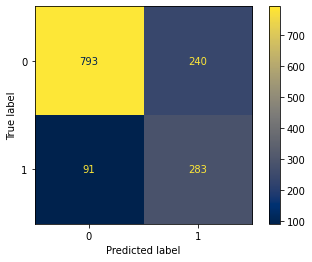

In [48]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=300, bootstrap=True,oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('oob score: ', bag_clf.oob_score_)
clf = 'Bagging'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Pasting</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>Pasting also builds instances of predictors on random subsets of training data but the sampling is done without replacement.<br><li>This means no predictor can have duplicate instances of samples.<br><li>Surely here the ensemble need to keep in mind not to take same instances. So this has lesser randomness than bagging method.<br><li>We can implement Pasting by making <code>bootstrap=False</code> in BaggingClassifier.<br><li>The <code>max_samples</code> defines the number of samples on which each predictor is to be trained.</div>


              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7638
F1 Score: 0.6320


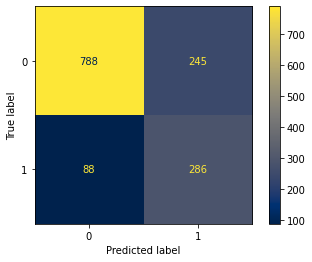

In [49]:
pas_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
clf = 'Pasting'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Random Subspace Ensemble</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>This method combines predictions from multiple predictor trained on random subsets of features in training data.<br><li>As you can see here we are specifing `max_features` to be used to train predictor.<br><li>We can keep <code>bootstrap_feature</code> True or False according to our wish if we want to resample features with replacement or without.</div>

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.78      1407

ROC_AUC_Score: 0.7207
F1 Score: 0.5881


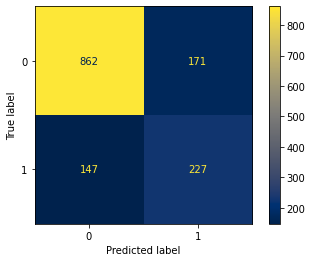

In [50]:
rs_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_features=20, bootstrap_features=True, n_jobs=-1, random_state=42)
rs_clf.fit(X_train, y_train)
y_pred = rs_clf.predict(X_test)
clf = 'Random Subspace'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Random Patches Ensemble</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>Random subspace with bagging or pasting is called Random Patches.<br><li>Here predictors are trained on random samples of instances and features of training data.<br><code>bootstrap</code> and <code>bootstrap_features</code> value is our choice</div>

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7638
F1 Score: 0.6320


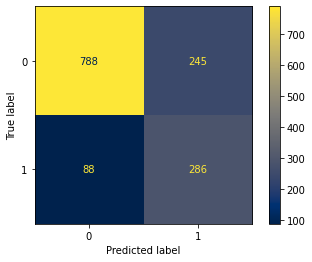

In [51]:
rp_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=500, max_features=10, bootstrap=True, bootstrap_features=False, n_jobs=-1, random_state=42)
rp_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
clf = 'Random Patches'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Random Forests</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20"><li>Random forest is an ensemble of Decision Trees trained with the bagging(bootstrap aggregation) method.<br><li>When constructing decision trees random forest use greedy algorithm to choose the most optimal split.</div>

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.54      0.73      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.77      1407

ROC_AUC_Score: 0.7533
F1 Score: 0.6224


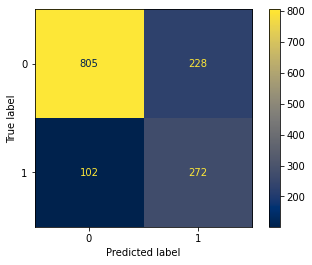

In [52]:
rf_clf = RandomForestClassifier(n_estimators=500, max_samples=400, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
clf = 'Random Forest'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Extra Trees ensemble or Extremely Randomized Trees</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">This method works same as random forest except that the decision trees are fitted on whole training data and are constructed via <b>random</b> splits.<br>This brings even more randomness while training.</div>

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.76      1407

ROC_AUC_Score: 0.7418
F1 Score: 0.6051


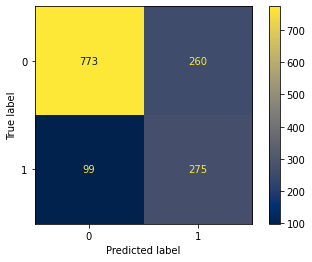

In [53]:
etc_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_split=300, random_state=42)
etc_clf.fit(X_train, y_train)
y_pred = etc_clf.predict(X_test)
clf = 'Extra Trees'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#FF5851;font-size:28px;padding:10px 10px;color:white;border:4px solid #1C1B20">Boosting</div> 
<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Boosting methods works by training predictors sequencially unlike bagging and pasting methods that trained predictors parallely and aggregated the results of all predictors.<br>Boosting method combines several weak learners improving after every predictor to form a strong learner.</div>

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">AdaBoost</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Adaptive boosting method focuses on correcting the predecessor predictor's wrongly classified instances. It is call adaptive because the weights are adaptive and are reassigned after every predictor (weak learner) output and higher weights are assigned to wrongly classiified instance.<br>So each predictor learns from the previous predictor and tries to minimize error made by it.</div>

              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1033
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC_AUC_Score: 0.7529
F1 Score: 0.6238


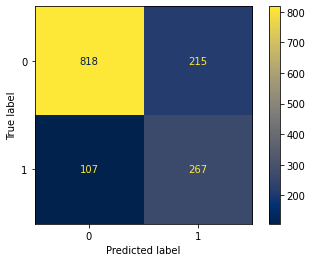

In [54]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=300, learning_rate=1.0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
clf = 'Adaboost'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT)</div> 

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">This method tries to reduce error made by previous predictor by training the new decision tree on the residual errors of the previous decisionn tree.<br>We can consider that, after training each tree we are doing <code>y_test_new = y_test - y_pred</code></div>

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1033
           1       0.59      0.71      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.81      0.79      0.80      1407

ROC_AUC_Score: 0.7639
F1 Score: 0.6423


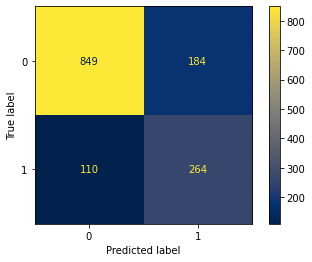

In [55]:
gbdt_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=20, max_leaf_nodes=2, random_state=42)
gbdt_clf.fit(X_train, y_train)
y_pred = gbdt_clf.predict(X_test)
clf = 'Gradient Boosting'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#FF5851;font-size:24px;padding:10px 10px;color:white;border:4px solid #1C1B20">Variants of GradientBoosting - XGBoost | LightGBM | CatBoost</div> 

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">XGBoost</div>

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7526
F1 Score: 0.6192


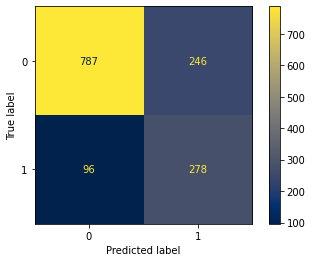

In [56]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">LightGBM</div>

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1033
           1       0.58      0.70      0.63       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407

ROC_AUC_Score: 0.7547
F1 Score: 0.6295


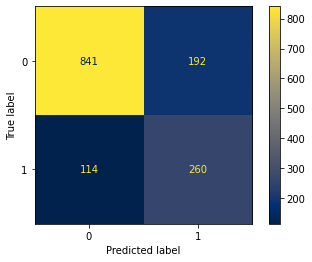

In [57]:
lgbm_clf = LGBMClassifier(n_estimators=7000, max_depth=2, num_leaves=2, random_state=42)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
clf = 'LightGBM'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">CatBoost</div>

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

ROC_AUC_Score: 0.7353
F1 Score: 0.6074


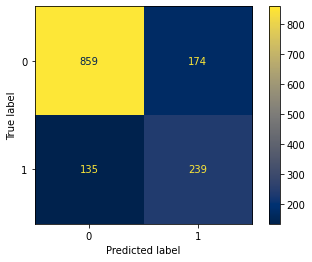

In [58]:
cat_clf = CatBoostClassifier(n_estimators=500, max_depth=4, random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
clf = 'CatBoost'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Voting Classifier</div>

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Hard voting classifier aggregates the predictions of each classifier we passed as estimators and predicts the class that gets most votes. Soft voting combines the predicted probabilities and predicts the class wth the maximum probability.<br> We can do hard or soft voting by changing the voting parameter in sklearn's.</div>

XGBClassifier 0.7525870860532895
XGBClassifier 0.6191536748329622
LGBMClassifier 0.7546603786282621
LGBMClassifier 0.62953995157385
CatBoostClassifier 0.735298000217424
CatBoostClassifier 0.6073697585768741
VotingClassifier 0.7547988569712845
VotingClassifier 0.6284348864994026
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1033
           1       0.57      0.70      0.63       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407

ROC_AUC_Score: 0.7548
F1 Score: 0.6284


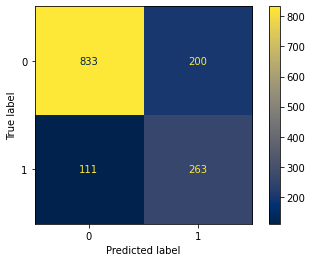

In [59]:
voting_clf = VotingClassifier(
estimators=[('xgb', xgb_clf), ('lgbm', lgbm_clf), ('cat', cat_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
for clf in (xgb_clf, lgbm_clf, cat_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    print(clf.__class__.__name__, f1_score(y_test, y_pred))
    
clf = 'Voting Classifier'
model_eval(clf, y_test, y_pred)

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Voting Classifier usually gives better accuracy than one of the single predictor that made it, but here we got slightly less f1 score. This might be because the predictions made by individual predictors are almost same and got wrong for some more instances.<br>Voting classifier usually performs better if the underlying classifiers are diverse.</div>

## <div style="background-color:#F3C130;font-size:18px;padding:10px 10px;color:black;border:4px solid #1C1B20">Stacking Classifier</div>

<div style="background-color:#B49A85;font-size:16px;padding:10px 10px;color:black;border:4px solid #1C1B20">Stacking/Blending classifier aggregates the predictions of the individual underlying classifiers just like voting classifer but instead of har vote the final predictions are done by passing all the individual prediction to a final predictor or a blender. This blender specifies the weights on its own.</div>

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1033
           1       0.57      0.70      0.63       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407

ROC_AUC_Score: 0.7548
F1 Score: 0.6284


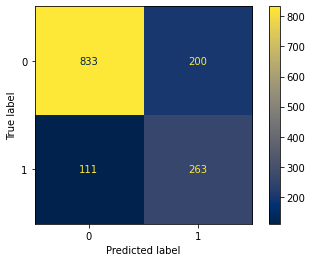

In [60]:
stack_clf = StackingClassifier(estimators = [('bag', bag_clf),
                                             ('pas', pas_clf),
                                             ('rs', rs_clf),
                                             ('rp', rp_clf),                                             
                                             ('rf', rf_clf),
                                             ('etc', etc_clf),
                                             ('ada', ada_clf),
                                             ('gbdt', gbdt_clf),
                                             ('xgb',xgb_clf),
                                             ('lgbm',lgbm_clf),
                                             ('cat',cat_clf)],
                           final_estimator = rf_clf)

stack_clf.fit(X_train, y_train)
stack_clf.predict(X_test)
clf = 'Stack'
model_eval(clf, y_test, y_pred)

## <div style="background-color:#FF5851;font-size:28px;padding:10px 10px;color:white;border:4px solid #1C1B20">Results</div> 

In [61]:
d = {'Classifier': clf_name, 'ROC_AUC_Score':roc_auc, 'F1_Score':f1}
clf_report = pd.DataFrame(data=d).set_index('Classifier').sort_values('F1_Score', ascending=False)
clf_report

,ROC_AUC_Score,F1_Score
Classifier,,
Gradient Boosting,0.763880,0.642336
Pasting,0.763766,0.632044
Random Patches,0.763766,0.632044
Bagging,0.762176,0.630992
LightGBM,0.754660,0.629540
Voting Classifier,0.754799,0.628435
Stack,0.754799,0.628435
Adaboost,0.752886,0.623832
Random Forest,0.753278,0.622426


# <div style="font-size:34px;padding:10px 10px;color:black;border:4px solid #1C1B20;text-align:center">Tenure Prediction</div>

In [62]:
df_tenure = df.drop('Churn', axis=1)
df_tenure = pd.get_dummies(df_tenure, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'])
df_tenure

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [63]:
y = df_tenure['tenure']
X = df_tenure.drop(columns=['tenure'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sc_r = StandardScaler()
X_train= sc_r.fit_transform(X_train)
X_test= sc_r.transform(X_test)
smt_r = SMOTE(random_state=42)
X_train, y_train = smt_r.fit_resample(X_train, y_train)

In [64]:
xgb_r = XGBRegressor(n_estimators=1000, random_state=42)
xgb_r.fit(X_train,y_train)
y_pred = xgb_r.predict(X_test)

In [65]:
print(f'R Squared Score: {r2_score(y_pred, y_test)}')

R Squared Score: 0.9965164918633648


# <div style="font-size:34px;padding:10px 10px;color:black;border:4px solid #1C1B20;text-align:center">Predictions on a Custom User Data</div>

In [66]:
inputs = ['Female', 1, 'Yes', 'Yes', 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 20, 24]
user_input_df = df.drop(columns=['tenure', 'Churn'])
user_input = pd.DataFrame(inputs, index=user_input_df.columns).T
user_input

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,1,Yes,Yes,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),20,24


In [67]:
user_input_df = user_input_df.append(user_input, ignore_index=True)
user_input_df = pd.get_dummies(user_input_df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'])
user_input_df_r = sc_r.transform(user_input_df)
user_input_df = sc.transform(user_input_df)
user_input_r = user_input_df[user_input_df_r.shape[0]-1, :]
user_input_r = pd.DataFrame(user_input_r).T
user_input = user_input_df[user_input_df.shape[0]-1, :]
user_input = pd.DataFrame(user_input).T

In [68]:
churn = ['No', 'Yes']
print('Expected Tenure: {:.0f} months'.format(xgb_r.predict(user_input_r)[0]))
print('Churn Prediction: {} \nThere is a {:.02f}% chance that the customer will leave.'.format(churn[gbdt_clf.predict(user_input)[0]], gbdt_clf.predict_proba(user_input)[:, 1][0]*100))

Expected Tenure: 4 months
Churn Prediction: Yes 
There is a 73.81% chance that the customer will leave.


# <div style="background-color:#414A6B;font-size:40px;padding:10px 10px;color:white;border:4px solid #1C1B20">Deployed Prediction App</div>

#### The Churn prediction app is deployed [Telco Churn and Tenure Prediction](https://telco-churn-streamlit.herokuapp.com/)

## <div style="background-color:#FF5851;font-size:28px;padding:10px 10px;color:white;border:4px solid #1C1B20;text-align:center">Thank You!</div> 